# Μερος Γ

Σκοπός του τρίτου μέρους του παραδοτέου είναι η χρήση ενός SVM ταξινομητή προκειμένου να ταξινομήσουμε τα δεδομένα απο το datesetCTest.csv.

Αρχικά φορτώνουμε τα δεδομένα απο το αρχείο csv και τα διαχωρίζουμε σε train και test δεδομένα με τον ίδιο τρόπο όπως στα προηγούμενα μέρη.

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data from CSV
data = pd.read_csv(r"D:\projects\Pattern-Recognition\dataset.csv", header=None)
data = data.values 

#printing the data
print(data)

# Split the data into features (X) and labels (y)
X = data[:, :-1]
y = data[:, -1]

# Split the data into training and test sets using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


[[ 1.8036    4.4229    3.      ]
 [ 3.4615    4.1436    2.      ]
 [ 2.1873    3.9964    1.      ]
 [ 3.0933    2.9056    1.      ]
 [ 1.7586    2.4109    1.      ]
 [ 1.3935    3.3955    3.      ]
 [-0.25885  -0.30159   1.      ]
 [ 7.1342    4.0605    1.      ]
 [ 3.1281    3.4291    2.      ]
 [ 5.7726    0.95443   2.      ]
 [ 1.6966    2.3042    1.      ]
 [ 4.5855    6.8982    1.      ]
 [ 1.9932    3.8719    1.      ]
 [ 1.8076    1.4564    1.      ]
 [ 2.5472    5.1554    3.      ]
 [ 4.9085    3.5222    2.      ]
 [ 4.8933    3.7063    1.      ]
 [ 0.85293   0.56615   1.      ]
 [ 2.1049    2.9689    1.      ]
 [ 3.1312    3.5776    2.      ]
 [ 1.2831    3.6174    3.      ]
 [-0.64185   4.9521    3.      ]
 [ 6.1643    5.7793    1.      ]
 [ 0.79251   1.9034    1.      ]
 [ 5.131     3.2936    2.      ]
 [ 3.9074    4.0554    2.      ]
 [ 6.044     1.5146    2.      ]
 [ 5.9782    5.8386    1.      ]
 [ 4.8381    3.1233    2.      ]
 [ 0.92854   5.4136    3.      ]
 [ 1.561  

Στην συνέχεια καλούμε την βιβλιοθήκη scikit-learn που περιέχει τον γραμμικό ταξινομητή SVM και την βιβλιοθήκη time προκειμένου να μπορέσουμε να υπολογίσουμε τον χρόνο που χρειάζεται ο ταξινομητής μας για να εκπαιδεύσει το μοντέλο και να κάνει προβλέψεις στα δεδομένα.

In [47]:
from sklearn import svm
import time

linear_classifier = svm.SVC(kernel= 'linear')
start_time = time.time()

Κάνουμε fit τα δεδομένα μας στον ταξινομητή που έχουμε ορίσει.

In [48]:
linear_classifier.fit(X_train, y_train)
end_time = time.time()
print(f'the training time is: {end_time - start_time} seconds')

the training time is: 1.3967227935791016 seconds


Βάζουμε τον ταξινομητή να μας κάνει προβλέψεις και χρονομετρούμε την ώρα που χρειάστηκε καθώς και υπολογίζουμε την ακρίβεια του ταξινομητή στα train δεδομένα.

In [49]:
from sklearn.metrics import accuracy_score

start_time = time.time()
x_train_prediction = linear_classifier.predict(X_train)
end_time = time.time()

training_data_accuracy = accuracy_score(y_train, x_train_prediction)
print(f'Prediction time for train images: {end_time - start_time} seconds')

training_data_ac = accuracy_score(y_train, x_train_prediction)
print(f'The accuracy score on training data is: {training_data_ac}')

Prediction time for train images: 0.0009989738464355469 seconds
The accuracy score on training data is: 0.8071428571428572


Με τον ίδιο τρόπο υπολογίζουμε την ακρίβεια του ταξινομητή στα testing δεδομένα 

In [76]:
start_time = time.time()
x_test_prediction = linear_classifier.predict(X_test)
end_time = time.time()

testing_data_accuracy = accuracy_score(y_test, x_test_prediction)
print(f'Prediction time for test images: {end_time - start_time} seconds')

testing_data_ac = accuracy_score(y_test, x_test_prediction)
print(f'The accuracy score on testing data is: {testing_data_ac}')

Prediction time for test images: 0.000997304916381836 seconds
The accuracy score on testing data is: 0.7857142857142857


Ορίζουμε την συνάρτηση αναπαράστασης των δεδομένων μας σε 2D μορφή, όπου το σχήμα καθορίζει την κλάση στην οποία ανήκει η κάθε γραμμή. Επιπλέον απεικονίζουμε και τις 3 περιοχές που προκύπτουν απο τον ταξινομητή με τις γραμμές να χωρίζουν τις περιοχές μεταξύ τους.

In [74]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import numpy as np

def plot_func(x, y, clf ):
   
    plt.style.use('_mpl-gallery')
   
    fig, ax = plt.subplots(figsize=(8, 6)) 

    # Ploting the decision boundaries and margins with a specific figure size
    plot_decision_regions(x, y.astype(np.int_), clf, legend=2, ax=ax)

    # Add labels and legend
    ax.set_xlabel('X-axis label')
    ax.set_ylabel('Y-axis label')
    ax.legend()

    # Show the plot
    plt.show()

Καλούμε την συνάρτηση plot_func για τα training δεδομένα μας και αναπαριστούμε το γράφημά μας.

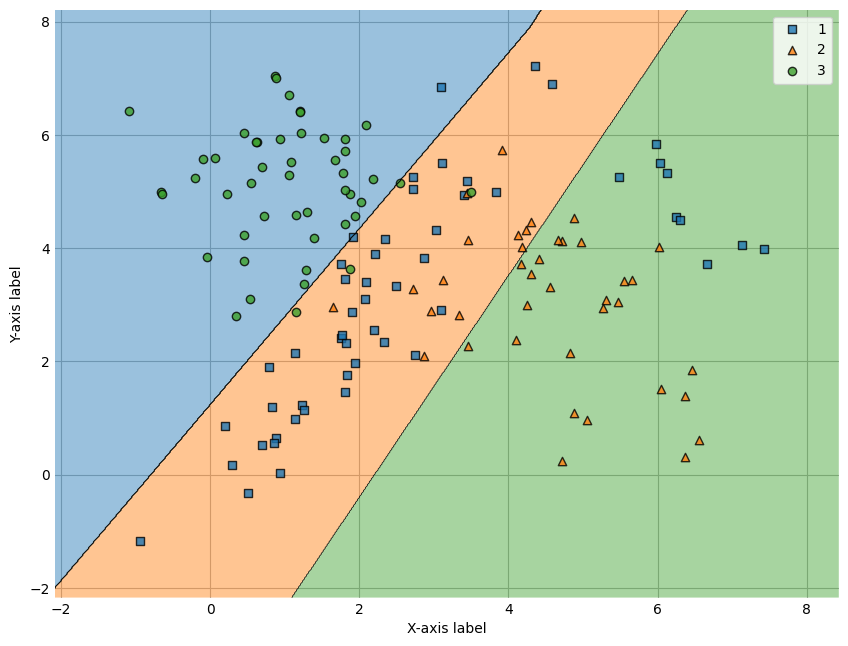

In [73]:
plot_func(X_train, y_train, linear_classifier)

Από το παραπάνω διάγραμμα παρατηρούμε ότι ο ταξινομητής έχει καταφέρει να ταξινομήσει τα περισσότερα απο τα training στοιχεία μας στην σωστή κλάση, ενώ οι κλάσεις που έχουν τις λανθασμένες απεικονίσεις βρίσκονται στις περιοχές κοντά στα decision vectors. Επιπλέον, παρατηρούμε ότι ο ταξινομητής έχει καταφέρει να 

Καλούμε την συνάρτηση plot_func για τα testing δεδομένα μας και αναπαριστούμε το γράφημά μας.

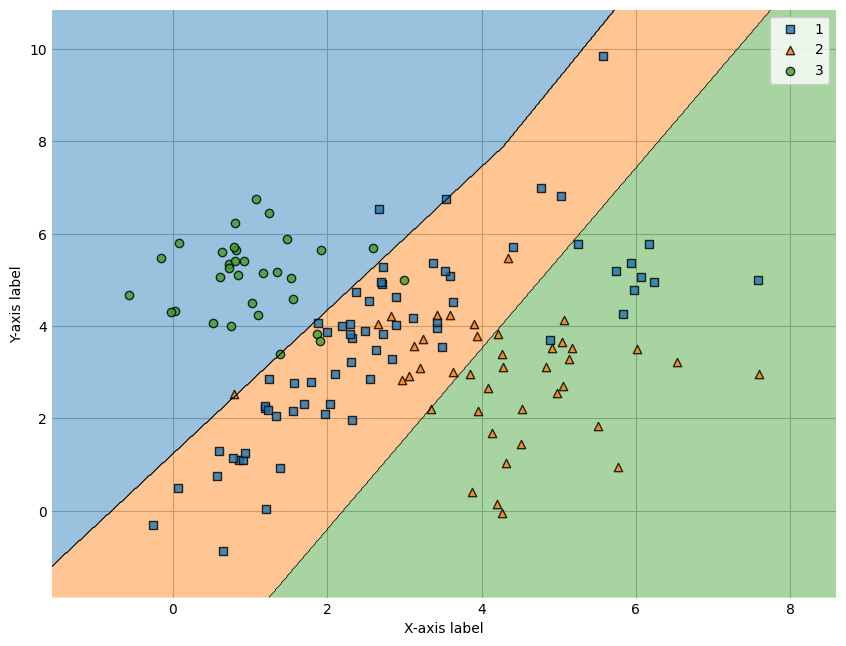

In [77]:
plot_func(X_test, y_test, linear_classifier)

Όσον αφορά τα testing δεδομένα μας ...

## Ταξινομητής με RBF kernel  